# Python Demo Notebook for Exploring Funda Dataset

In [16]:
import os
import re

import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from dataset import FundaDataset
import seaborn as sns
sns.set_theme()
sns.set_palette('Set2')
sns.set(rc={'figure.figsize':(15,8)})

Load the original dataset

In [2]:
json_path = '/home/miranda/Documents/school/UvA/6_MMA/Datasets/Funda/ads.jsonlines'
img_path = '/home/miranda/Documents/school/UvA/6_MMA/Datasets/Funda/images'

df = pd.read_json(json_path, lines=True)
df.set_index('funda_identifier', inplace=True)
df

,crawl_time,url,images_paths,location_part1,location_part2,location_part3,price,highlights,features,in_the_neighborhood,geolocation,description
funda_identifier,,,,,,,,,,,,
42126054,2023-05-25 13:17:59.212873216,https://www.funda.nl/koop/amersfoort/huis-4212...,"[42126054/image3.jpeg, 42126054/image1.jpeg, 4...",Hogeweg 66,3814 CE Amersfoort,Kruiskamp-Zuid,"€ 450,000 k.k.","{'living area': '110 m²', 'plot size': '189 m²...",{'transfer of ownership': {'asking price': '€ ...,"[Elementary school, Supermarket, Bus stop]","{'lat': '52.15718', 'lon': '5.400165'}",Dichtbij het stadscentrum van Amersfoort lig...
42111133,2023-05-20 16:49:18.722795008,https://www.funda.nl/koop/amsterdam/appartemen...,"[42111133/image3.jpeg, 42111133/image1.jpeg, 4...",Kloveniersburgwal 127 3,1011 KD Amsterdam,Nieuwmarkt/Lastage,"€ 850,000 k.k.","{'living area': '94 m²', 'bedrooms': '2'}",{'transfer of ownership': {'asking price': '€ ...,"[Elementary school, Supermarket, Bus stop]","{'lat': '52.36824', 'lon': '4.896607'}",Prachtig appartement met twee ruime slaapkam...
42126250,2023-05-26 11:43:53.866551296,https://www.funda.nl/koop/venlo/huis-88580896-...,"[42126250/image3.jpeg, 42126250/image1.jpeg, 4...",Olivijn 8,5912 PV Venlo,Hagerbroek,"€ 498,000 k.k.","{'living area': '160 m²', 'plot size': '333 m²...",{'transfer of ownership': {'asking price': '€ ...,"[Elementary school, Supermarket, Bus stop]","{'lat': '51.35439', 'lon': '6.172892'}","Olivijn 8, 5912 PV Venlo. Deze ruime, vrijs..."
42189920,2023-05-25 17:11:47.099635712,https://www.funda.nl/koop/blaricum/huis-421899...,"[42189920/image3.jpeg, 42189920/image1.jpeg, 4...",Dwarslaan 10,1261 BB Blaricum,Blaricum-Dorp,"€ 1,750,000 k.k.","{'living area': '206 m²', 'plot size': '1,153 ...",{'transfer of ownership': {'asking price': '€ ...,"[Elementary school, Supermarket, Bus stop]","{'lat': '52.27979', 'lon': '5.239072'}",Op één van de mooiste locaties van Blaricum...
42115579,2023-05-18 19:19:57.765576704,https://www.funda.nl/koop/echt/huis-42115579-v...,"[42115579/image3.jpeg, 42115579/image1.jpeg, 4...",Vuurdoornstraat 1,6101 MB Echt,Echt Noord,"€ 399,000 k.k.","{'living area': '157 m²', 'plot size': '419 m²...",{'transfer of ownership': {'asking price': '€ ...,"[Elementary school, Supermarket, Bus stop]","{'lat': '51.11259', 'lon': '5.875482'}",WEGENS DE GROTE BELANGSTELLING VOOR DEZE WO...
...,...,...,...,...,...,...,...,...,...,...,...,...
42106554,2023-05-19 08:50:45.456057600,https://www.funda.nl/koop/voorschoten/appartem...,"[42106554/image3.jpeg, 42106554/image1.jpeg, 4...",Schoolstraat 1 D,2251 BD Voorschoten,Centrum,"€ 650,000 k.k.","{'living area': '120 m²', 'bedrooms': '2'}",{'transfer of ownership': {'asking price': '€ ...,"[Elementary school, Supermarket, Bus stop]","{'lat': '52.12664', 'lon': '4.448399'}",UNIEKE KANS OM IN HET CENTRUM VAN VOORSCHOT...
42126573,2023-05-25 14:33:51.462606336,https://www.funda.nl/koop/tilburg/huis-4212657...,"[42126573/image3.jpeg, 42126573/image1.jpeg, 4...",Nijverstraat 115,5041 AE Tilburg,Theresia,"€ 200,000 k.k.","{'living area': '98 m²', 'plot size': '87 m²',...",{'transfer of ownership': {'asking price': '€ ...,"[Elementary school, Supermarket, Bus stop]","{'lat': '51.56446', 'lon': '5.08902'}",.
42105071,2023-05-19 07:59:51.159569664,https://www.funda.nl/koop/eindhoven/appartemen...,"[42105071/image3.jpeg, 42105071/image1.jpeg, 4...",Veldmaarschalk Montgomerylaan 33,5612 BA Eindhoven,Gildebuurt,"€ 495,000 k.k.","{'living area': '125 m²', 'bedrooms': '2'}",{'transfer of ownership': {'asking price': '€ ...,"[Elementary school, Supermarket, Bus stop]","{'lat': '51.44576', 'lon': '5.476079'}",*Representatief wonen - hartje centum in 'O...


Not all houses contain price information, filtering out the ones that don't have price information leaves us with 16643 entries (-107).

In [3]:
def filter_price(df):
    """
    Filters the items to only keep the ones that contain the price. the price in € is converted to int
    """
    # filter rows with regex
    regex = re.compile(r'€\s*(?P<price>\d{1,3}([,\.]\d{3})*)\s*(k\.k\.|v\.o\.n\.)')
    df = df[df['price'].apply(lambda x: regex.match(x) is not None)].copy()
    # extract price
    df['price'] = df['price'].map(lambda x: regex.match(x).groupdict()['price'])
    # remove commas
    df['price'] = df['price'].map(lambda x: x.replace(',', '').replace('.', ''))
    # convert to int
    df['price'] = df['price'].astype(int)
    return df

df_price = filter_price(df)
# df_price

Plot the distribution of housing prices

<Axes: xlabel='price', ylabel='Count'>

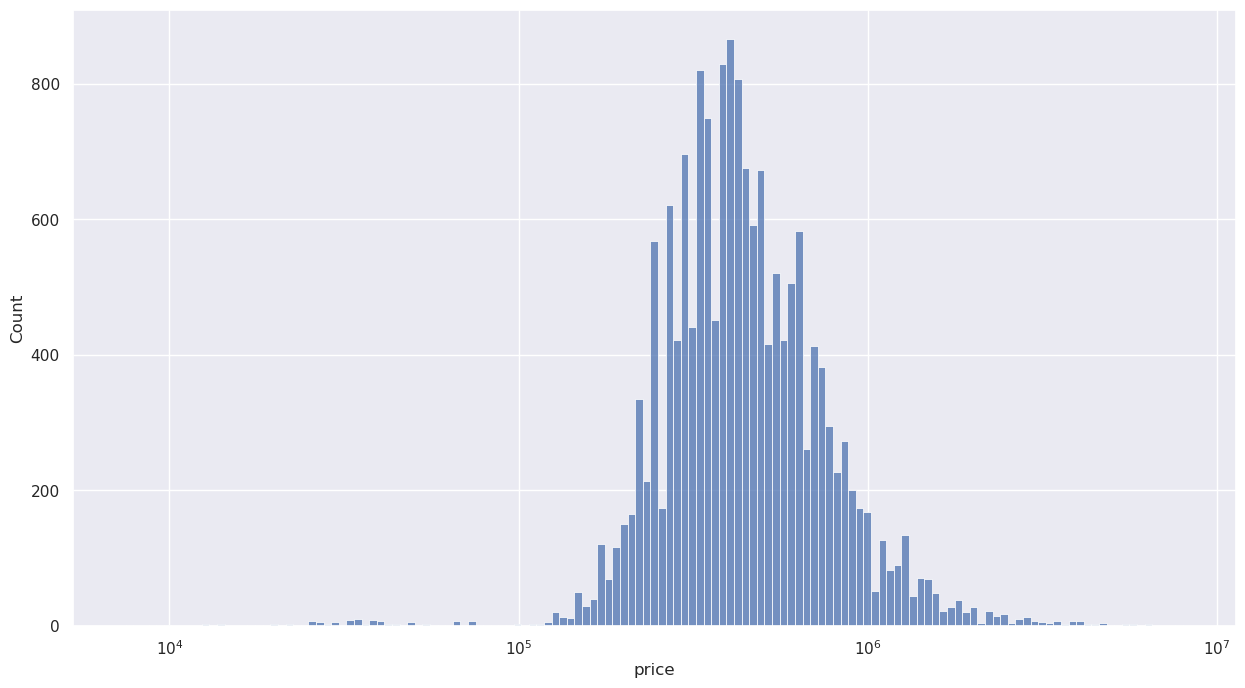

In [17]:
sns.histplot(data=df_price, x='price', log_scale=True)

Let's take a look at possible neighboring accomodations

In [24]:
counts = {}
for i in df_price['in_the_neighborhood']:
    for j in i:
        # print(j)
        if j in counts:
            counts[j] += 1
        else:
            counts[j] = 1

print(counts)

{'Elementary school': 16642, 'Supermarket': 16642, 'Bus stop': 16642, 'Basisschool': 1, 'Supermarkt': 1, 'Bushalte': 1}


It seems that all entries have the same neighboring accomodations (not that 1 entry is accidentally in dutch), therefore this would not be an useful feature for our model to consider

In [25]:
for i in df_price['location_part2']:
    city = i.split(' ')
    print(city)


['3814', 'CE', 'Amersfoort']
['1011', 'KD', 'Amsterdam']
['5912', 'PV', 'Venlo']
['1261', 'BB', 'Blaricum']
['6101', 'MB', 'Echt']
['5343', 'JC', 'Oss']
['2742', 'PP', 'Waddinxveen']
['1018', 'RS', 'Amsterdam']
['5126', 'VW', 'Gilze']
['4515', 'AZ', 'IJzendijke']
['4194', 'AT', 'Meteren']
['7942', 'NA', 'Meppel']
['7132', 'CE', 'Lichtenvoorde']
['3961', 'JV', 'Wijk', 'bij', 'Duurstede']
['5063', 'EB', 'Oisterwijk']
['4116', 'CA', 'Buren', '(GE)']
['4731', 'HM', 'Oudenbosch']
['4827', 'KB', 'Breda']
['1051', 'GV', 'Amsterdam']
['5491', 'XX', 'Sint-Oedenrode']
['6663', 'Lent']
['3612', 'AZ', 'Tienhoven']
['3601', 'AG', 'Maarssen']
['9851', 'BB', 'Burum']
['2317', 'KE', 'Leiden']
['1243', 'KN', "'s-Graveland"]
['6824', 'LA', 'Arnhem']
['2012', 'BE', 'Haarlem']
['1082', 'TR', 'Amsterdam']
['6521', 'NM', 'Nijmegen']
['1701', 'NT', 'Heerhugowaard']
['1211', 'CT', 'Hilversum']
['3762', 'VR', 'Soest']
['5074', 'RS', 'Biezenmortel']
['7313', 'EM', 'Apeldoorn']
['4617', 'MD', 'Bergen', 'op', 'Zo